In [24]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

In [60]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [61]:
print(len(train_data))
print(len(test_data))

8982
2246


In [62]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [63]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [64]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [65]:
import numpy as np

### 数据向量化

In [66]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [67]:
print(x_train)
print(x_train.shape)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
(8982, 10000)


### 标签数据向量化

#### 标签数据向量化有两种方法
可以将标签列表转换为整数张量，或者使用one-hot编码

In [68]:
# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.
#         return results
    
# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels)
# print(one_hot_test_labels)


# keras内置方法也可以实现这个操作
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 构建网络

In [69]:
from keras import models
from keras import layers


In [70]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

### 编译模型

In [71]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 留出验证集

In [72]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### 训练模型

In [73]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 92ms/step - loss: 2.7054 - accuracy: 0.5130 - val_loss: 1.7911 - val_accuracy: 0.6160
Epoch 2/20
16/16 [==============================] - 1s 67ms/step - loss: 1.4589 - accuracy: 0.6923 - val_loss: 1.3462 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 1s 69ms/step - loss: 1.0677 - accuracy: 0.7722 - val_loss: 1.1437 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 1s 66ms/step - loss: 0.8320 - accuracy: 0.8226 - val_loss: 1.0388 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 1s 66ms/step - loss: 0.6651 - accuracy: 0.8599 - val_loss: 0.9733 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 67ms/step - loss: 0.5264 - accuracy: 0.8900 - val_loss: 0.9436 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 67ms/step - loss: 0.4296 - accuracy: 0.9080 - val_loss: 0.9028 - val_accuracy: 0.8140
Epoch 8/20
16

### 绘制训练损失和验证损失

In [74]:
import matplotlib.pyplot as plt

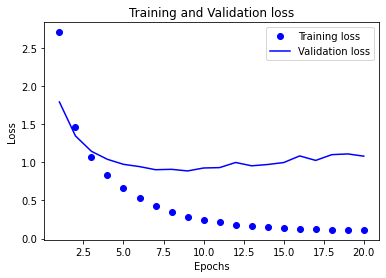

In [75]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

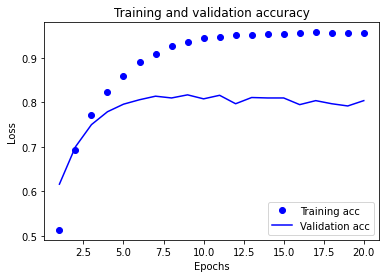

In [80]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

可以看到验证损失在第九轮达到最佳，也就是说模型在第九轮后就达到了过拟合，现在重新训练一个模型

In [82]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 83ms/step - loss: 2.6151 - accuracy: 0.5025 - val_loss: 1.7178 - val_accuracy: 0.6240
Epoch 2/9
16/16 [==============================] - 1s 68ms/step - loss: 1.4220 - accuracy: 0.7136 - val_loss: 1.2982 - val_accuracy: 0.7180
Epoch 3/9
16/16 [==============================] - 1s 68ms/step - loss: 1.0598 - accuracy: 0.7739 - val_loss: 1.1363 - val_accuracy: 0.7540
Epoch 4/9
16/16 [==============================] - 1s 67ms/step - loss: 0.8368 - accuracy: 0.8229 - val_loss: 1.0681 - val_accuracy: 0.7700
Epoch 5/9
16/16 [==============================] - 1s 67ms/step - loss: 0.6670 - accuracy: 0.8599 - val_loss: 0.9893 - val_accuracy: 0.7930
Epoch 6/9
16/16 [==============================] - 1s 67ms/step - loss: 0.5367 - accuracy: 0.8889 - val_loss: 0.9440 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 1s 66ms/step - loss: 0.4331 - accuracy: 0.9083 - val_loss: 0.9270 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

In [85]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 0s 6ms/step - loss: 0.9828 - accuracy: 0.7907


[0.982805609703064, 0.790739119052887]

### 在新数据上进行预测

In [87]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [90]:
np.sum(predictions[1])

1.0

In [91]:
np.argmax(predictions[0])

3